In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random

In [3]:
x=[]
for i in range(50):
    x.append(random.randint(10,90))


In [4]:
y=[random.choice([0,1]) for i in range(50)]

In [5]:
df=pd.DataFrame(data=x,columns=['AGE'])
df['myopia']=y

In [6]:
df.head()

,AGE,myopia
0,10,1
1,26,0
2,52,0
3,72,0
4,29,0


In [7]:
screen_time=[random.randint(1,10) for i in range(50)]
# screen_time

In [8]:
df['screen_time']=screen_time

In [9]:
c=df.pop('myopia')



In [10]:
df.insert(2,'myopia',c) # using pop and insert we can change column location

In [11]:
df

,AGE,screen_time,myopia
0,10,5,1
1,26,9,0
2,52,1,0
3,72,7,0
4,29,3,0
5,30,4,1
6,59,1,1
7,67,2,0
8,73,4,1
9,88,4,1


# we want to make one neuron that takes input and make output
# Using Age as input and myopia as output

In [12]:
X=df['AGE']/np.max(df['AGE'])

In [13]:
X  # Scaling before model digestion improves performance

0     0.113636
1     0.295455
2     0.590909
3     0.818182
4     0.329545
5     0.340909
6     0.670455
7     0.761364
8     0.829545
9     1.000000
10    0.761364
11    0.352273
12    0.397727
13    0.943182
14    0.568182
15    0.306818
16    0.840909
17    0.227273
18    0.693182
19    0.534091
20    0.681818
21    0.125000
22    0.545455
23    0.511364
24    0.295455
25    0.193182
26    0.738636
27    0.477273
28    0.397727
29    0.272727
30    0.465909
31    0.477273
32    0.681818
33    0.147727
34    0.818182
35    0.806818
36    0.409091
37    0.659091
38    0.806818
39    0.363636
40    0.181818
41    0.715909
42    0.227273
43    0.511364
44    0.363636
45    0.340909
46    0.681818
47    0.579545
48    0.340909
49    0.806818
Name: AGE, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
# ones are coeff and bias= 0 initially input is only one i..e AGE

In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
X
y

[1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0]

In [ ]:
model.fit(X_train, np.array(y_train), epochs=5000)

In [25]:
X=df.drop(['myopia'],axis=1)
X.head()

,AGE,screen_time
0,10,5
1,26,9
2,52,1
3,72,7
4,29,3


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,df['myopia'],test_size=0.2,random_state=0)

In [51]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train.shape
X_train

array([[0.03846154, 0.44444444],
       [0.78205128, 0.22222222],
       [0.70512821, 0.33333333],
       [0.79487179, 0.77777778],
       [0.65384615, 0.33333333],
       [0.73076923, 0.11111111],
       [0.51282051, 0.        ],
       [0.25641026, 0.44444444],
       [0.25641026, 0.33333333],
       [0.17948718, 0.        ],
       [0.21794872, 0.44444444],
       [0.3974359 , 0.55555556],
       [0.64102564, 0.55555556],
       [0.82051282, 1.        ],
       [0.12820513, 0.77777778],
       [0.64102564, 1.        ],
       [0.44871795, 0.66666667],
       [0.80769231, 0.33333333],
       [0.93589744, 1.        ],
       [0.08974359, 0.33333333],
       [0.25641026, 0.33333333],
       [0.12820513, 0.88888889],
       [0.07692308, 1.        ],
       [0.78205128, 0.11111111],
       [0.20512821, 0.88888889],
       [0.32051282, 0.44444444],
       [0.61538462, 0.88888889],
       [0.20512821, 0.88888889],
       [0.62820513, 0.        ],
       [0.44871795, 0.66666667],
       [0.

In [52]:
X_test=scaler.transform(X_test)
X_test.shape
X_test

array([[0.32051282, 1.        ],
       [0.26923077, 0.22222222],
       [0.73076923, 0.44444444],
       [0.67948718, 0.66666667],
       [0.53846154, 0.        ],
       [0.41025641, 0.22222222],
       [0.78205128, 0.88888889],
       [0.41025641, 0.66666667],
       [0.48717949, 0.22222222],
       [0.24358974, 0.22222222]])

In [68]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense  

In [72]:
model=Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))

In [74]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model.fit(X_train,y_train,epochs=5000)

Epoch 1/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.7225 - accuracy: 0.6000
Epoch 2/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.7222 - accuracy: 0.6000
Epoch 3/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.7218 - accuracy: 0.6000
Epoch 4/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.7216 - accuracy: 0.6000
Epoch 5/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.7213 - accuracy: 0.6000
Epoch 6/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.7211 - accuracy: 0.6000
Epoch 7/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.7208 - accuracy: 0.6000
Epoch 8/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.7205 - accuracy: 0.6000
Epoch 9/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.7203 - accuracy: 0.6000
Epoch 10/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.7200 - accuracy: 0.6000
Epoch 11/5000


2/2 [==============================] - 0s 9ms/step - loss: 0.7047 - accuracy: 0.6000
Epoch 84/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.7046 - accuracy: 0.6000
Epoch 85/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.7044 - accuracy: 0.6000
Epoch 86/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.7043 - accuracy: 0.6000
Epoch 87/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.7041 - accuracy: 0.6000
Epoch 88/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.7040 - accuracy: 0.6000
Epoch 89/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.7039 - accuracy: 0.6000
Epoch 90/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.7038 - accuracy: 0.6000
Epoch 91/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.7036 - accuracy: 0.6000
Epoch 92/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.7035 - accuracy: 0.6000
Epoch 93/5000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 0.6964 - accuracy: 0.5750
Epoch 165/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.5750
Epoch 166/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6961 - accuracy: 0.5750
Epoch 167/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6961 - accuracy: 0.5750
Epoch 168/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6960 - accuracy: 0.5750
Epoch 169/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6959 - accuracy: 0.5750
Epoch 170/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6959 - accuracy: 0.5750
Epoch 171/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6958 - accuracy: 0.5750
Epoch 172/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.5750
Epoch 173/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.5750
Epoch 174/5000


2/2 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5750
Epoch 246/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 247/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 248/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 249/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 250/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 251/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 252/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 253/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5750
Epoch 254/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6919 - accuracy: 0.5750
Epoch 255/5000


2/2 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5750
Epoch 327/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5750
Epoch 328/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6906 - accuracy: 0.5750
Epoch 329/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6906 - accuracy: 0.5750
Epoch 330/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6905 - accuracy: 0.5750
Epoch 331/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6905 - accuracy: 0.5750
Epoch 332/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.5750
Epoch 333/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6904 - accuracy: 0.5750
Epoch 334/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6904 - accuracy: 0.5750
Epoch 335/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6903 - accuracy: 0.5750
Epoch 336/50

2/2 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.5750
Epoch 408/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5750
Epoch 409/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6886 - accuracy: 0.5750
Epoch 410/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6885 - accuracy: 0.5750
Epoch 411/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.5750
Epoch 412/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.5750
Epoch 413/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.5750
Epoch 414/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6885 - accuracy: 0.5750
Epoch 415/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.5750
Epoch 416/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.5750
Epoch 417/50

2/2 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.5750
Epoch 489/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6876 - accuracy: 0.5750
Epoch 490/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6876 - accuracy: 0.5750
Epoch 491/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 492/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 493/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 494/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 495/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 496/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 497/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.5750
Epoch 498/500

2/2 [==============================] - 0s 8ms/step - loss: 0.6868 - accuracy: 0.5750
Epoch 570/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 571/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 572/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 573/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 574/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 575/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 576/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 577/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 578/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5750
Epoch 579/5

2/2 [==============================] - 0s 8ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 651/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 652/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 653/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 654/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 655/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 656/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6859 - accuracy: 0.5750
Epoch 657/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6858 - accuracy: 0.5750
Epoch 658/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6858 - accuracy: 0.5750
Epoch 659/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6858 - accuracy: 0.5750
Epoch 660/500

2/2 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 732/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 733/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 734/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 735/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 736/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 737/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6850 - accuracy: 0.5750
Epoch 738/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6849 - accuracy: 0.5750
Epoch 739/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5750
Epoch 740/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5750
Epoch 741/500

2/2 [==============================] - 0s 9ms/step - loss: 0.6843 - accuracy: 0.5750
Epoch 813/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 814/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 815/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 816/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 817/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 818/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 819/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 820/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 821/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5750
Epoch 822/500

2/2 [==============================] - 0s 7ms/step - loss: 0.6834 - accuracy: 0.6000
Epoch 894/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.6000
Epoch 895/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6834 - accuracy: 0.6000
Epoch 896/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.6000
Epoch 897/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6834 - accuracy: 0.6000
Epoch 898/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6834 - accuracy: 0.6000
Epoch 899/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6833 - accuracy: 0.6000
Epoch 900/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6833 - accuracy: 0.6000
Epoch 901/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6833 - accuracy: 0.6000
Epoch 902/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6833 - accuracy: 0.6000
Epoch 903/50

2/2 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 975/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 976/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 977/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 978/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 979/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 980/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 981/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.6000
Epoch 982/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.6000
Epoch 983/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.6000
Epoch 984/500

2/2 [==============================] - 0s 9ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1056/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1057/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1058/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1059/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1060/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1061/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1062/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1063/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6821 - accuracy: 0.6000
Epoch 1064/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.6000
Ep

2/2 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 0.6000
Epoch 1136/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6815 - accuracy: 0.6000
Epoch 1137/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6815 - accuracy: 0.6000
Epoch 1138/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6815 - accuracy: 0.6000
Epoch 1139/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.6000
Epoch 1140/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.6000
Epoch 1141/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.6000
Epoch 1142/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.6000
Epoch 1143/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.6000
Epoch 1144/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.6000
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.6000
Epoch 1217/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1218/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6809 - accuracy: 0.6000
Epoch 1219/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1220/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1221/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1222/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1223/5000
2/2 [==============================] - 0s 25ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1224/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6808 - accuracy: 0.6000
Epoch 1225/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6808 - accuracy: 0.6000
Ep

2/2 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1298/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1299/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1300/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1301/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1302/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1303/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1304/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1305/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6802 - accuracy: 0.6000
Epoch 1306/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6802 - accuracy: 0.6000
Epo

2/2 [==============================] - 0s 9ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1379/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1380/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1381/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1382/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1383/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.6000
Epoch 1384/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1385/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.6000
Epoch 1386/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.6000
Epoch 1387/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6796 - accuracy: 0.6000
Epo

2/2 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1460/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1461/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1462/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1463/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1464/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1465/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1466/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1467/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6791 - accuracy: 0.6000
Epoch 1468/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6791 - accuracy: 0.6000
Ep

2/2 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1541/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1542/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1543/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1544/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1545/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1546/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1547/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1548/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch 1549/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 0.6783 - accuracy: 0.6000
Epoch 1622/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1623/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1624/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1625/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1626/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1627/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1628/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1629/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch 1630/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6782 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1703/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1704/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1705/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1706/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1707/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1708/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1709/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1710/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch 1711/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1784/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1785/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1786/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1787/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1788/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1789/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1790/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1791/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6774 - accuracy: 0.6000
Epoch 1792/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6774 - accuracy: 0.6000
Ep

2/2 [==============================] - 0s 10ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1865/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1866/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1867/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1868/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1869/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1870/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1871/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1872/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6771 - accuracy: 0.6000
Epoch 1873/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6771 - accuracy: 0.6000
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1946/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1947/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1948/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1949/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1950/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1951/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1952/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1953/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch 1954/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6767 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2027/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2028/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2029/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2030/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2031/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2032/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2033/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2034/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch 2035/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6763 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2108/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2109/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2110/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2111/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2112/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2113/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2114/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6760 - accuracy: 0.6000
Epoch 2115/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.6000
Epoch 2116/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.6000
Epoch 

2/2 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2189/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2190/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2191/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2192/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2193/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2194/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2195/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2196/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 2197/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2270/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2271/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2272/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2273/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2274/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2275/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2276/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2277/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch 2278/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6753 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2351/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2352/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2353/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2354/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2355/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2356/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2357/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2358/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 2359/5000
2/2 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6000
Epo

2/2 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2432/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2433/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2434/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2435/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2436/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2437/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2438/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2439/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch 2440/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2513/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2514/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2515/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2516/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2517/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2518/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2519/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2520/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6745 - accuracy: 0.6000
Epoch 2521/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6000
Epoc

2/2 [==============================] - 0s 6ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2594/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2595/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6741 - accuracy: 0.6000
Epoch 2596/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2597/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2598/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2599/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2600/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6741 - accuracy: 0.6000
Epoch 2601/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6742 - accuracy: 0.6000
Epoch 2602/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6741 - accuracy: 0.6000
Epo

2/2 [==============================] - 0s 10ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2674/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2675/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2676/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2677/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2678/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2679/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2680/5000
2/2 [==============================] - 0s 42ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2681/5000
2/2 [==============================] - 0s 21ms/step - loss: 0.6739 - accuracy: 0.6000
Epoch 2682/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6739 - accuracy: 0.6

2/2 [==============================] - 0s 11ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2754/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2755/5000
2/2 [==============================] - 0s 19ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2756/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2757/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2758/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2759/5000
2/2 [==============================] - 0s 15ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2760/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2761/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6737 - accuracy: 0.6000
Epoch 2762/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6737 - accuracy: 0.600

Epoch 2834/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2835/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2836/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2837/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2838/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2839/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2840/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2841/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2842/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6734 - accuracy: 0.6000
Epoch 2843/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6734 - accurac

Epoch 2915/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2916/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2917/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2918/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2919/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2920/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2921/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2922/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2923/5000
2/2 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6000
Epoch 2924/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6731 - acc

2/2 [==============================] - 0s 12ms/step - loss: 0.6729 - accuracy: 0.6000
Epoch 2997/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 2998/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 2999/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 3000/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 3001/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 3002/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 3003/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 3004/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch 3005/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6728 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3078/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3079/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3080/5000
2/2 [==============================] - 0s 15ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3081/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3082/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3083/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3084/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3085/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.6000
Epoch 3086/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6727 - accuracy: 0.6000
Epo

2/2 [==============================] - 0s 12ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3159/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6725 - accuracy: 0.6000
Epoch 3160/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3161/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3162/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3163/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3164/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6725 - accuracy: 0.6000
Epoch 3165/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3166/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6724 - accuracy: 0.6000
Epoch 3167/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6724 - accuracy: 0.6000
E

Epoch 3239/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3240/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3241/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3242/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3243/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3244/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3245/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3246/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3247/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6723 - accuracy: 0.6000
Epoch 3248/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6723 - accur

Epoch 3320/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6722 - accuracy: 0.6000
Epoch 3321/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6722 - accuracy: 0.6000
Epoch 3322/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.6000
Epoch 3323/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6721 - accuracy: 0.6000
Epoch 3324/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6722 - accuracy: 0.6000
Epoch 3325/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.6000
Epoch 3326/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6721 - accuracy: 0.6000
Epoch 3327/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.6000
Epoch 3328/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.6000
Epoch 3329/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6721 - accura

Epoch 3401/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3402/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3403/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3404/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3405/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3406/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3407/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3408/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3409/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6720 - accuracy: 0.6000
Epoch 3410/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6720 - acc

2/2 [==============================] - 0s 10ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3482/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3483/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3484/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3485/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3486/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3487/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3488/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3489/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 3490/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6718 - accuracy: 0.6000
Epo

2/2 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3562/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3563/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3564/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3565/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3566/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3567/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3568/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3569/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.6000
Epoch 3570/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6716 - accuracy: 0.6000


2/2 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3642/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3643/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3644/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3645/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3646/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3647/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 3648/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6714 - accuracy: 0.6000
Epoch 3649/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6714 - accuracy: 0.6000
Epoch 3650/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6714 - accuracy: 0.6000
E

2/2 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3722/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3723/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3724/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3725/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3726/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3727/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3728/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3729/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 3730/5000
2/2 [==============================] - 0s 16ms/step - loss: 0.6713 - accuracy: 0.60

2/2 [==============================] - 0s 12ms/step - loss: 0.6711 - accuracy: 0.6000
Epoch 3802/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3803/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3804/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3805/5000
2/2 [==============================] - 0s 16ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3806/5000
2/2 [==============================] - 0s 17ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3807/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3808/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3809/5000
2/2 [==============================] - 0s 13ms/step - loss: 0.6712 - accuracy: 0.6000
Epoch 3810/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6712 - accuracy: 0.60

2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3882/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3883/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3884/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6711 - accuracy: 0.6000
Epoch 3885/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3886/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3887/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3888/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3889/5000
2/2 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3890/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoc

2/2 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3963/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3964/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3965/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3966/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3967/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3968/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3969/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 3970/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch 3971/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 14ms/step - loss: 0.6708 - accuracy: 0.6000
Epoch 4044/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6708 - accuracy: 0.6000
Epoch 4045/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4046/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4047/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4048/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4049/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4050/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4051/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.6000
Epoch 4052/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6709 - accuracy: 0.6000
Ep

2/2 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4125/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4126/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4127/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4128/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4129/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4130/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4131/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4132/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch 4133/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6707 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 13ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4206/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4207/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4208/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4209/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4210/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4211/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4212/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4213/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6000
Epoch 4214/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6706 - accuracy: 0.6000
Epoc

2/2 [==============================] - 0s 8ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4287/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4288/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4289/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4290/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4291/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4292/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4293/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4294/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4295/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6705 - accuracy: 0.6000


2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4367/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4368/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6705 - accuracy: 0.6000
Epoch 4369/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4370/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4371/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4372/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4373/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4374/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4375/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.6000
Epo

Epoch 4447/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4448/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4449/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4450/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4451/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4452/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4453/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4454/5000
2/2 [==============================] - 0s 14ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4455/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.6000
Epoch 4456/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6704 - ac

2/2 [==============================] - 0s 7ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 4528/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4529/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 4530/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 4531/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4532/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4533/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 4534/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 4535/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6703 - accuracy: 0.6000
Epoch 4536/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4609/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4610/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4611/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4612/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4613/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4614/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4615/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4616/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 4617/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6702 - accuracy: 0.6000
Epoch 

2/2 [==============================] - 0s 9ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4690/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4691/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4692/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4693/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4694/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4695/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4696/5000
2/2 [==============================] - 0s 6ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4697/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6701 - accuracy: 0.6000
Epoch 4698/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6701 - accuracy: 0.6000
Ep

2/2 [==============================] - 0s 11ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4771/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4772/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4773/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4774/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4775/5000
2/2 [==============================] - 0s 7ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4776/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4777/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4778/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6700 - accuracy: 0.6000
Epoch 4779/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6700 - accuracy: 0.6000


Epoch 4851/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4852/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4853/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4854/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4855/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4856/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4857/5000
2/2 [==============================] - 0s 8ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4858/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4859/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4860/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6699 - accura

2/2 [==============================] - 0s 7ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4932/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4933/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4934/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4935/5000
2/2 [==============================] - 0s 9ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4936/5000
2/2 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4937/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4938/5000
2/2 [==============================] - 0s 11ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4939/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.6000
Epoch 4940/5000
2/2 [==============================] - 0s 10ms/step - loss: 0.6699 - accuracy: 0.600

In [77]:
from sklearn.metrics import accuracy_score

In [79]:
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[0.5566365 ],
       [0.6201642 ],
       [0.60257906],
       [0.58443475],
       [0.6378328 ],
       [0.6202415 ],
       [0.56614673],
       [0.5842824 ],
       [0.6202838 ],
       [0.6201501 ]], dtype=float32)

In [81]:
y_test

28    0
11    1
10    0
41    0
2     0
27    1
38    1
31    1
22    1
4     0
Name: myopia, dtype: int64

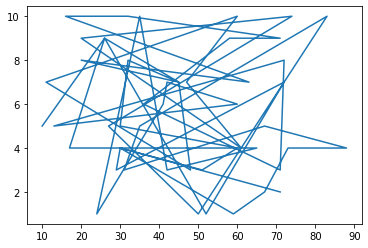

In [82]:
plt.p(df['AGE'],df['screen_time'])